In [1]:
# Install Prophet

!pip install prophet yfinance


In [3]:
# Download Stock Data

import yfinance as yf
import pandas as pd

ticker = "AAPL"
raw = yf.download(ticker, start="2015-01-01")

# Choose the right price column
if "Adj Close" in raw.columns:
    price_col = "Adj Close"
elif "Close" in raw.columns:
    price_col = "Close"
else:
    # Fallback: first numeric column
    price_col = raw.select_dtypes(include="number").columns[0]

data = raw[[price_col]].reset_index()
data.columns = ["ds", "y"]   # Prophet expects columns named ds (date) and y (value)

data.head()



/tmp/ipython-input-2280617828.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(ticker, start="2015-01-01")
[*********************100%***********************]  1 of 1 completed


,ds,y
0,2015-01-02,24.237551
1,2015-01-05,23.554739
2,2015-01-06,23.556955
3,2015-01-07,23.887274
4,2015-01-08,24.805088


In [4]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


Train/Test Split

In [5]:
train_size = int(len(data) * 0.8)
train_df = data.iloc[:train_size]
test_df  = data.iloc[train_size:]


In [6]:
m = Prophet(daily_seasonality=True)
m.fit(train_df)


Forecast and Evaluate

In [7]:
future   = m.make_future_dataframe(periods=len(test_df), freq="D")
forecast = m.predict(future)

y_test       = test_df["y"].values
prophet_pred = forecast.iloc[train_size:]["yhat"].values

rmse = np.sqrt(mean_squared_error(y_test, prophet_pred))
mae  = mean_absolute_error(y_test, prophet_pred)
rmse, mae


(np.float64(47.57258604821611), 40.536922383041855)

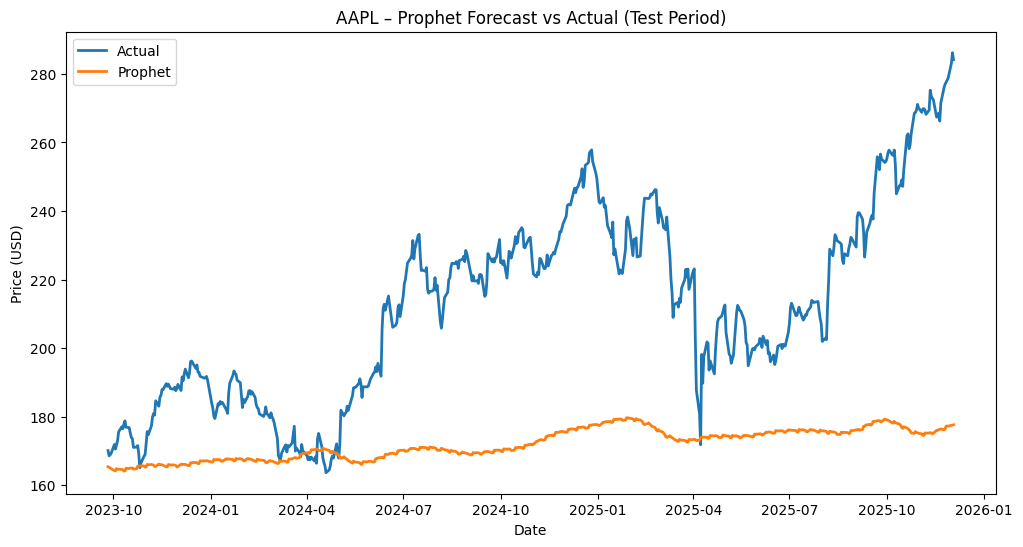

In [8]:
plt.figure(figsize=(12,6))
plt.plot(test_df["ds"], y_test, label="Actual", linewidth=2)
plt.plot(test_df["ds"], prophet_pred, label="Prophet", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("AAPL – Prophet Forecast vs Actual (Test Period)")
plt.legend()
plt.show()


🔹 1. Prophet is designed for smooth, seasonal, business-type data

Prophet works best on:

website traffic

sales

daily logins

seasonal demand

weather-like patterns

Stock prices do not have seasonal or predictable patterns. They are noisy, chaotic, and heavily driven by news & market sentiment.

🔹 2. Prophet assumes slow-changing trends

Stocks change fast. Prophet changes slow.

🔹 3. Prophet cannot capture high volatility

LSTM learns patterns from sequences. Prophet cannot.